In [1]:
%matplotlib inline

import json
import datetime
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model, ensemble, svm, feature_selection

sys.path.append("../")
import utils.load_data as ld
import utils.transformations as tf
import utils.machine_learning as ml

In [2]:
reload(tf)
reload(ml)

<module 'utils.machine_learning' from '../utils/machine_learning.pyc'>

## import

get greatest market losses over the next 1, 3 and 6 months for each date

In [3]:
market = ld.latest_csv_to_pandas('market')
market.columns = ['dow', 's&p', 'nasdaq']

In [4]:
market.head()

,dow,s&p,nasdaq
Date,,,
1970-01-02,NaN,93.000000,NaN
1970-01-05,NaN,93.459999,NaN
1970-01-06,NaN,92.820000,NaN
1970-01-07,NaN,92.629997,NaN
1970-01-08,NaN,92.680000,NaN


In [5]:
# create df of lagged returns
ticker = 's&p'
px = pd.DataFrame(data=market[ticker].values, 
                  columns=[0,], 
                  index=market[ticker].index)
for i in range(1, 180):
    px[i] = px[0].shift(-1 * i)
ret = (px.div(px[0], axis='index')
       .applymap(lambda x: x - 1.))

In [6]:
# build df of max losses over multiple ranges
losses = {}
for months in (1,3,6):
    per = 22 * months 
    losses[months] = pd.Series(data=[tf.get_max_loss(per, ret.ix[i:,:]) for i in range(0,ret.shape[0]-per)],
                              index=ret.index[:ret.shape[0]-per])
losses = pd.DataFrame(losses)

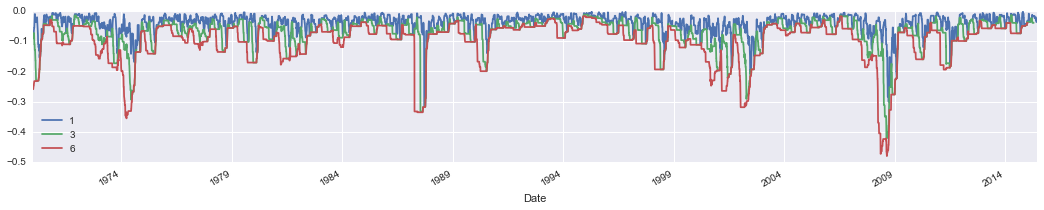

In [7]:
losses.plot(figsize=[18,3])

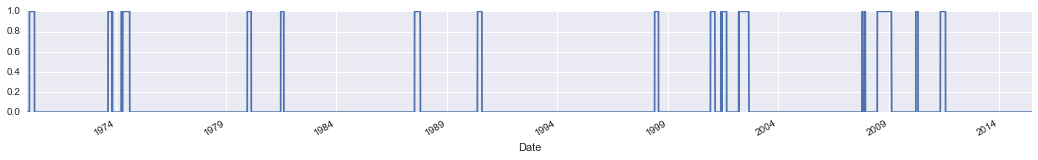

In [8]:
losses = tf.classify_losses(losses, loss_threshold=-.15, period=3)
losses.plot(figsize=[18,2])

import FRED data

In [9]:
fred = ld.latest_csv_to_pandas('fred')

In [10]:
fred.head()

,GDP,CPIAUCSL,CPILFESL,VIXCLS,VXVCLS,AAA,DTB3,TOTDTEUSQ163N,GFDEGDQ188S,EXHOSLUSM495S,LES1252881600Q
DATE,,,,,,,,,,,
1970-01-01,1053.5,37.9,39.6,NaN,NaN,7.91,NaN,NaN,35.31153,NaN,NaN
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,7.92,NaN,NaN,NaN,NaN
1970-01-05,NaN,NaN,NaN,NaN,NaN,NaN,7.91,NaN,NaN,NaN,NaN
1970-01-06,NaN,NaN,NaN,NaN,NaN,NaN,7.93,NaN,NaN,NaN,NaN
1970-01-07,NaN,NaN,NaN,NaN,NaN,NaN,7.90,NaN,NaN,NaN,NaN


import scraped multipl data

In [11]:
multipl = ld.latest_multipl_json_to_pandas()

In [12]:
multipl.head()

title,1 Month Treasury Rate,1 Year Treasury Rate,10 Year Real Interest Rate,10 Year Treasury Rate,12 month EPS,2 Year Treasury Rate,20 Year Real Interest Rate,20 Year Treasury Rate,3 Month Treasury Rate,3 Year Treasury Rate,...,US Inflation Rate,US Labor Force Participation Rate,US Long Term Unemployment Rate,US Median Income Growth Rate,US Median Real Income Growth,US Real GDP Growth Rate,US Real Income Per Capita Growth Rate,US Real Retail Sales,US Real Retail Sales Growth,US Retail Sales Growth
date,,,,,,,,,,,,,,,,,,,,,
1871-01-01 00:00:00,NaN,NaN,NaN,0.0532,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-01-31 00:00:00,NaN,NaN,NaN,NaN,0.0763,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01 00:00:00,NaN,NaN,NaN,0.0532,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-28 00:00:00,NaN,NaN,NaN,NaN,0.0741,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01 00:00:00,NaN,NaN,NaN,0.0533,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## consolidate

In [13]:
start = datetime.datetime(1970, 1, 1)
def generalize(df):
    df = df.resample('d', fill_method='ffill')
    df.index.name = 'date'
    df = df.ix[start:]
    return df
market = generalize(market)
fred = generalize(fred)
multipl = generalize(multipl)
frames = [market, fred, multipl]
ag = pd.concat(frames, axis=1)

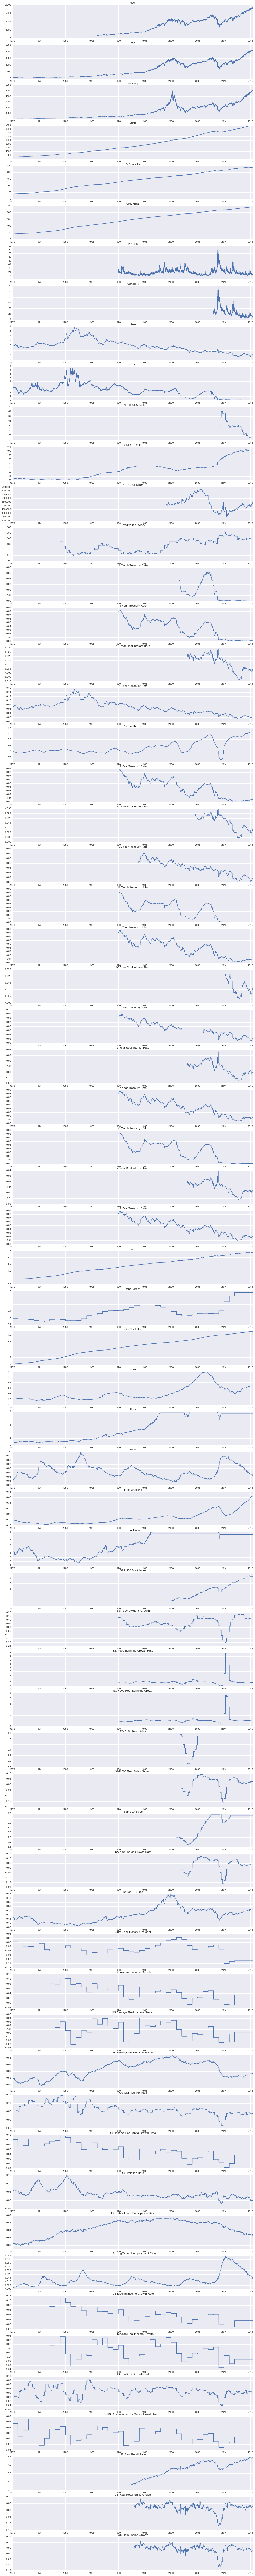

In [14]:
# plot each series
count = len(ag.columns)
fig, axes = plt.subplots(nrows=count, figsize=[18, count * 3])
for ind in range(count):
    (ag[ag.columns[ind]].plot(title=ag.columns[ind],
                              ax=axes[ind])
     .set_xlabel(""))

## basic model

create new dataframe with columns in levels, change, or standard deviation space

In [15]:
# build features using every available column and transformation
# skip column if doesn't have data available at start date
start = datetime.datetime(1970, 1, 1)
features = pd.DataFrame()
for c in ag.columns:
    if not pd.isnull(ag.ix[ag.index == start][c].values[0]):
        features['{0} level'.format(c)] = ag[c]
        for y in (.125, .25, .5, 1, 2, 5,):
            features['{0} change {1} years'.format(c, y)] = tf.change_space(ag[c], y)
            features['{0} std {1} years'.format(c, y)] = tf.std_space(ag[c], y)   
features.head()   

,GDP level,GDP change 0.125 years,GDP std 0.125 years,GDP change 0.25 years,GDP std 0.25 years,GDP change 0.5 years,GDP std 0.5 years,GDP change 1 years,GDP std 1 years,GDP change 2 years,...,US Real Income Per Capita Growth Rate change 0.25 years,US Real Income Per Capita Growth Rate std 0.25 years,US Real Income Per Capita Growth Rate change 0.5 years,US Real Income Per Capita Growth Rate std 0.5 years,US Real Income Per Capita Growth Rate change 1 years,US Real Income Per Capita Growth Rate std 1 years,US Real Income Per Capita Growth Rate change 2 years,US Real Income Per Capita Growth Rate std 2 years,US Real Income Per Capita Growth Rate change 5 years,US Real Income Per Capita Growth Rate std 5 years
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01,1053.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,1053.5,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1970-01-03,1053.5,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1970-01-04,1053.5,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1970-01-05,1053.5,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [16]:
# time series score
avg = pd.ewma(features, halflife=360*10, min_periods=360*2)
std = pd.ewmstd(features, halflife=360*10, min_periods=360*2)
scores = (((features - avg) / std)
          .dropna(axis=0, how='any'))

feature selection

In [17]:
# remove bad features with obviously outlying data
high_scores = scores.applymap(lambda x: abs(x)).max()
outliers = high_scores[high_scores > 5].index.values
scores = scores.drop(outliers, axis=1)

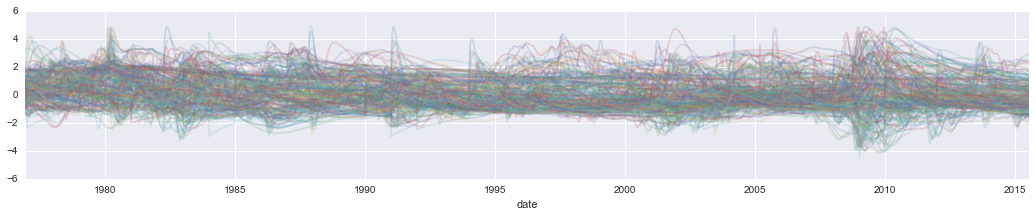

In [18]:
scores.plot(figsize=[18,3], alpha=.2, legend=False)

In [19]:
# select top performing features in univariate space
X_train, X_test, y_train, y_test = ml.gen_Xs_ys_split(scores, losses)
X_train, y_train = ml.upsample_hits(X_train, y_train)
#X_pruned = svm.LinearSVC(C=1, penalty="l1", dual=False).fit_transform(X_train, y_train)
X_pruned = (feature_selection.SelectKBest(feature_selection.f_classif, 
                                          k=50)
            .fit_transform(X_train, y_train))
selected_features = ml.infer_selected_features(X_train, X_pruned)

In [20]:
# regenerate X and ys without upsampling and toss out unselected features
X_train, X_test, y_train, y_test = ml.gen_Xs_ys_split(scores, losses)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

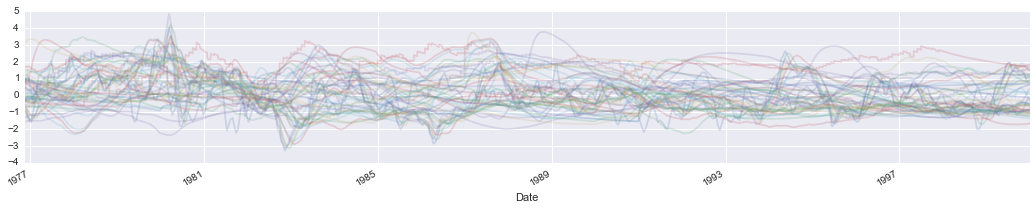

In [21]:
X_train.plot(figsize=[18,3], alpha=.2, legend=False)

run logistic regression

In [22]:
grid = ml.run_grid_search(linear_model.LogisticRegression, 
                          X_train,
                          y_train,
                          C=[.001, .01, .1, 1, 10], 
                          penalty=['l1', 'l2'])

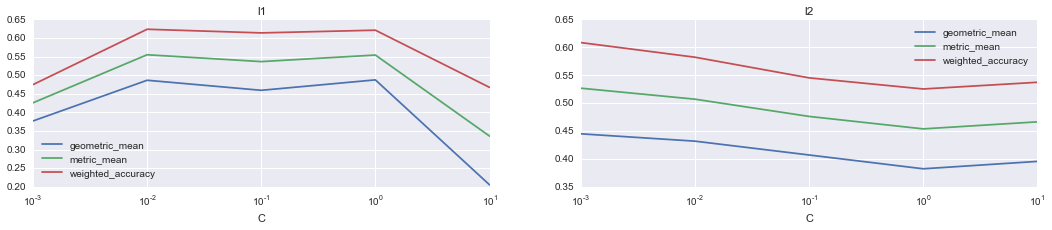

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=[18, 3])
grid[grid['penalty'] == 'l1'].set_index('C').plot(logx=True, ax=axes[0], title="l1")
grid[grid['penalty'] == 'l2'].set_index('C').plot(logx=True, ax=axes[1], title="l2")

pick model and plot learning curve

In [24]:
clf = linear_model.LogisticRegression(penalty="l1", C=1)
test_model(clf, (X_train, X_test, y_train, y_test))

NameError: name 'test_model' is not defined

run random forest

In [29]:
clf = ensemble.RandomForestClassifier(n_estimators=10, 
                                      #max_features=None,
                                      class_weight={0:1, 1: 10})
test_model(clf, (X_train, X_test, y_train, y_test))

r-squared:	0.938838709677
f1 score:	0.0
AUC score:	0.5

            0 - predicted  1 - predicted
0 - actual           3638              0
1 - actual            237              0


run support vector machine

In [30]:
clf = svm.SVC(class_weight='auto', C=1)
test_model(clf, (X_train, X_test, y_train, y_test))

r-squared:	0.938838709677
f1 score:	0.0
AUC score:	0.5

            0 - predicted  1 - predicted
0 - actual           3638              0
1 - actual            237              0


####questions and notes:

do we need to upsample data if logistic regression has a class weight function? is this doing the same thing?

rather than focus on hyperparameters, should i try adjusting the loss function to reflect the fact that simple accuracy isn'y what im interested in?